In [1]:
# Importing dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Importing CSV
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,3,3,4,1,3,2,4,3,0,0.0
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,4,4,4,5,5,4,4,0,3.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,4,4,3,3,4,3,5,4,0,0.0
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,4,4,4,3,4,2,0,0.0


In [3]:
# Filtering dataframe for disloyal & Eco plus customers
data = df[(df["Class"]=="Eco Plus")&(df["Customer Type"]=="disloyal Customer") ]
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
6309,dissatisfied,Female,disloyal Customer,79,Business travel,Eco Plus,356,4,4,4,...,5,4,4,4,4,1,4,1,4,0.0
18207,dissatisfied,Female,disloyal Customer,33,Business travel,Eco Plus,854,3,3,3,...,3,3,2,1,3,4,3,3,98,84.0
18223,dissatisfied,Female,disloyal Customer,42,Business travel,Eco Plus,855,2,2,2,...,5,5,3,4,4,4,2,5,0,0.0
19268,dissatisfied,Female,disloyal Customer,43,Business travel,Eco Plus,904,3,3,3,...,5,4,3,2,5,5,5,4,0,0.0
19439,dissatisfied,Female,disloyal Customer,55,Business travel,Eco Plus,912,4,4,4,...,5,4,5,3,4,5,1,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116069,dissatisfied,Male,disloyal Customer,29,Business travel,Eco Plus,4054,3,3,3,...,4,4,3,5,3,4,4,4,7,0.0
116143,dissatisfied,Female,disloyal Customer,30,Business travel,Eco Plus,4069,3,3,3,...,3,1,2,2,3,3,1,3,8,20.0
116486,dissatisfied,Male,disloyal Customer,30,Business travel,Eco Plus,4150,2,2,2,...,5,5,3,2,2,5,5,5,0,0.0
117207,satisfied,Female,disloyal Customer,17,Business travel,Eco Plus,4354,5,5,5,...,2,2,5,1,3,1,2,2,91,75.0


In [4]:
# Creating new dataframe from the filtered dataframe and dropping all demographic data
newdf = data.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance" ], axis=1)
feature_names = newdf.columns
newdf.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
6309,4,4,4,2,5,3,5,4,4,4,4,1,4,1,4,0.0
18207,3,3,3,3,3,3,3,3,2,1,3,4,3,3,98,84.0
18223,2,2,2,4,5,2,5,5,3,4,4,4,2,5,0,0.0
19268,3,3,3,2,4,3,5,4,3,2,5,5,5,4,0,0.0
19439,4,4,4,3,4,4,5,4,5,3,4,5,1,4,0,0.0


In [5]:
# Assigning target (y variable)
target = data["satisfaction"]
target_names = ["satisfied", "dissatisfied"]

In [6]:
# Checking nulls
newdf.isnull().sum()

Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             2
dtype: int64

In [7]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf, target, random_state=42)

In [8]:
# Importing imputer and training the dataset for nan values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [9]:
X_test = imputer.transform(X_test)

In [10]:
feature_names
lst = list(feature_names)
lst

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [11]:
# Importing Logistic Regression module
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=4000000)
classifier

LogisticRegression(max_iter=4000000)

In [12]:
# Training the dataset
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=4000000)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9721311475409836
Testing Data Score: 0.9754901960784313


In [14]:
# Testing the model
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
44412,dissatisfied,dissatisfied
76263,dissatisfied,dissatisfied
42476,dissatisfied,dissatisfied
48895,dissatisfied,dissatisfied
70822,dissatisfied,dissatisfied
...,...,...
50112,dissatisfied,dissatisfied
29694,dissatisfied,dissatisfied
53053,dissatisfied,dissatisfied
37617,dissatisfied,dissatisfied


In [15]:
# Checking feature importance
import eli5
eli5.show_weights(classifier, feature_names=lst)

Weight?,Feature
+1.923,Seat comfort
+1.228,Food and drink
+0.439,Baggage handling
+0.221,Checkin service
+0.178,Online boarding
+0.145,Inflight wifi service
+0.108,On-board service
+0.045,Departure/Arrival time convenient
+0.009,Arrival Delay in Minutes
-0.020,Departure Delay in Minutes


<AxesSubplot:>

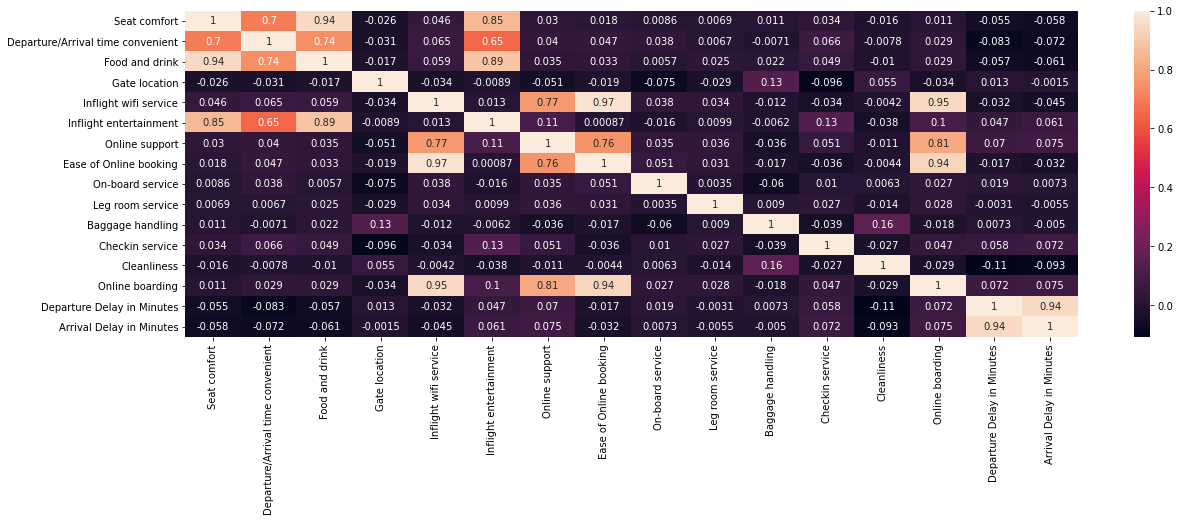

In [16]:
# Checking coorelation between variables
import seaborn as sns
cor = newdf.corr()
plt.figure(figsize = (20,6))
sns.heatmap(cor, annot=True)

In [17]:
# Creating a copy of the original dataset
improved = data.copy()
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
6309,dissatisfied,Female,disloyal Customer,79,Business travel,Eco Plus,356,4,4,4,...,5,4,4,4,4,1,4,1,4,0.0
18207,dissatisfied,Female,disloyal Customer,33,Business travel,Eco Plus,854,3,3,3,...,3,3,2,1,3,4,3,3,98,84.0
18223,dissatisfied,Female,disloyal Customer,42,Business travel,Eco Plus,855,2,2,2,...,5,5,3,4,4,4,2,5,0,0.0
19268,dissatisfied,Female,disloyal Customer,43,Business travel,Eco Plus,904,3,3,3,...,5,4,3,2,5,5,5,4,0,0.0
19439,dissatisfied,Female,disloyal Customer,55,Business travel,Eco Plus,912,4,4,4,...,5,4,5,3,4,5,1,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116069,dissatisfied,Male,disloyal Customer,29,Business travel,Eco Plus,4054,3,3,3,...,4,4,3,5,3,4,4,4,7,0.0
116143,dissatisfied,Female,disloyal Customer,30,Business travel,Eco Plus,4069,3,3,3,...,3,1,2,2,3,3,1,3,8,20.0
116486,dissatisfied,Male,disloyal Customer,30,Business travel,Eco Plus,4150,2,2,2,...,5,5,3,2,2,5,5,5,0,0.0
117207,satisfied,Female,disloyal Customer,17,Business travel,Eco Plus,4354,5,5,5,...,2,2,5,1,3,1,2,2,91,75.0


In [18]:
# Improving the scores for the top 3 variables
improved['Food and drink improved'] = np.where((improved['Food and drink'] <= 3),  improved['Food and drink']+1, improved['Food and drink'])
improved['Seat comfort improved'] = np.where((improved['Seat comfort'] <= 3),  improved['Seat comfort']+1, improved['Seat comfort'])
improved['Baggage handling improved'] = np.where((improved['Baggage handling'] <= 3),  improved['Baggage handling']+1, improved['Baggage handling'])


In [19]:
#improved.to_csv("test.csv")
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Food and drink improved,Seat comfort improved,Baggage handling improved
6309,dissatisfied,Female,disloyal Customer,79,Business travel,Eco Plus,356,4,4,4,...,4,4,1,4,1,4,0.0,4,4,4
18207,dissatisfied,Female,disloyal Customer,33,Business travel,Eco Plus,854,3,3,3,...,1,3,4,3,3,98,84.0,4,4,4
18223,dissatisfied,Female,disloyal Customer,42,Business travel,Eco Plus,855,2,2,2,...,4,4,4,2,5,0,0.0,3,3,4
19268,dissatisfied,Female,disloyal Customer,43,Business travel,Eco Plus,904,3,3,3,...,2,5,5,5,4,0,0.0,4,4,5
19439,dissatisfied,Female,disloyal Customer,55,Business travel,Eco Plus,912,4,4,4,...,3,4,5,1,4,0,0.0,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116069,dissatisfied,Male,disloyal Customer,29,Business travel,Eco Plus,4054,3,3,3,...,5,3,4,4,4,7,0.0,4,4,4
116143,dissatisfied,Female,disloyal Customer,30,Business travel,Eco Plus,4069,3,3,3,...,2,3,3,1,3,8,20.0,4,4,4
116486,dissatisfied,Male,disloyal Customer,30,Business travel,Eco Plus,4150,2,2,2,...,2,2,5,5,5,0,0.0,3,3,3
117207,satisfied,Female,disloyal Customer,17,Business travel,Eco Plus,4354,5,5,5,...,1,3,1,2,2,91,75.0,5,5,4


In [20]:
# Assigning the dependent variable
y_improved = improved["satisfaction"]

In [21]:
# Removing all demographic data and assigning to X variable
X_improved = improved.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance", "Inflight entertainment","Seat comfort", "Ease of Online booking" ], axis=1)

X_improved.head()

,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Food and drink improved,Seat comfort improved,Baggage handling improved
6309,4,4,2,5,5,4,4,4,1,4,1,4,0.0,4,4,4
18207,3,3,3,3,3,2,1,3,4,3,3,98,84.0,4,4,4
18223,2,2,4,5,5,3,4,4,4,2,5,0,0.0,3,3,4
19268,3,3,2,4,5,3,2,5,5,5,4,0,0.0,4,4,5
19439,4,4,3,4,5,5,3,4,5,1,4,0,0.0,4,4,4


In [22]:
X_improved = imputer.transform(X_improved)

In [23]:
# Running the model on the improved scores
predictions = classifier.predict(X_improved)
predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_improved})
predictions

,Prediction,Actual
6309,dissatisfied,dissatisfied
18207,satisfied,dissatisfied
18223,dissatisfied,dissatisfied
19268,dissatisfied,dissatisfied
19439,dissatisfied,dissatisfied
...,...,...
116069,dissatisfied,dissatisfied
116143,dissatisfied,dissatisfied
116486,dissatisfied,dissatisfied
117207,satisfied,satisfied


In [24]:
# Saving the predictions as CSV
predictions.to_csv("not_loyal_ecoplus_improved_ratings.csv")